**Problem Statement** : [Assignment](https://drive.google.com/file/d/1pRsfa03Jca9eLTrkQQKcdnKnTxbXtJVk/view?usp=sharing)

In [ ]:
pip install gym

In [ ]:
import numpy as np
import math
import gym
import random
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [ ]:
Pij = np.zeros((3,3,3))
Pij[:,:,0] = [[1/2, 1/4, 1/4], [1/2, 0, 1/2], [1/4, 1/4, 1/2]]
Pij[:,:,1] = [[1/16, 3/4, 3/16], [1/16, 7/8, 1/16], [1/8, 3/4, 1/8]]
Pij[:,:,2] = [[1/4, 1/8, 5/8], [0, 0, 0], [3/4, 1/16, 3/16]]

Rij = np.zeros((3,3,3))
Rij[:,:,0] = [[10, 4, 8], [14, 0, 18], [10, 2, 8]]
Rij[:,:,1] = [[8, 2, 4], [8, 16, 8], [6, 4, 2]]
Rij[:,:,2] = [[4, 6, 4], [0, 0, 0], [4, 0, 8]]

**Solving using Value iteration:**

In [ ]:
Ja = np.zeros((20,4))
policya = np.zeros((20,4))
beta = np.arange(0,1,0.05)
i = 0
for alpha in beta:
  J = np.zeros((1001,3))
  policy = np.zeros((1001,3))
  for iteration in range(1000):
    for oldstate in range(3):
      tempJ = np.zeros((3))
      for action in range(3):  
        for newstate in range(3):
          tempJ[action] += Pij[oldstate][newstate][action]*(-Rij[oldstate][newstate][action] + alpha * J[iteration][newstate])
      J[iteration+1][oldstate] = np.amin(tempJ)
      policy[iteration+1][oldstate] = np.argmin(tempJ) + 1
  Ja[i][0] = alpha
  Ja[i][1] = -J[1000][0]
  Ja[i][2] = -J[1000][1]
  Ja[i][3] = -J[1000][2]
  policya[i][0] = alpha
  policya[i][1] = int(policy[1000][0])
  policya[i][2] = int(policy[1000][1])
  policya[i][3] = int(policy[1000][2])
  i = i + 1


In [ ]:
Jopt = pd.DataFrame(Ja)
Jopt.columns = ['β','A','B','C']
policyopt = pd.DataFrame(policya.astype(int))
policyopt.columns = ['β','A','B','C']
policyopt["β"] = beta

In [ ]:
Jopt

,β,A,B,C
0,0.00,8.000000,16.000000,7.000000
1,0.05,8.511527,16.400260,7.498869
2,0.10,9.076506,16.856369,8.050865
3,0.15,9.708121,17.464503,8.669160
4,0.20,10.437030,18.482143,9.384398
5,0.25,11.274074,19.629630,10.207407
6,0.30,12.243837,20.934066,11.162756
7,0.35,13.378714,22.430769,12.282824
8,0.40,14.722222,24.166667,13.611111
9,0.45,16.334131,26.205534,15.207371


In [ ]:
policyopt

,β,A,B,C
0,0.00,1,1,1
1,0.05,1,1,1
2,0.10,1,1,1
3,0.15,1,2,1
4,0.20,1,2,1
5,0.25,1,2,1
6,0.30,1,2,1
7,0.35,1,2,1
8,0.40,1,2,1
9,0.45,1,2,1


**Solving this problem using Q learning:**

In [ ]:
Qf = np.zeros((20,10))
polic = np.zeros((20,4))
alpha = 0.2 # Learning rate
bet = np.arange(0,1,0.05)
j=0
for beta in bet:
  Q = np.random.random((3,3))
  flag = True
  while flag == True :
    #alpha = alpha * math.exp(-0.1)
    s = random.randrange(3)
    tempQ = Q
    for i in range(10000):
      aoptions = [np.argmax(Q[s]), random.randrange(3)]
      if s == 1:
        aoptions = [np.argmax(Q[s][0:2]), random.randrange(2)]
      a = random.choices(aoptions, weights = [0.9, 0.1])
      ns = random.choices(range(3), weights = [Pij[s][0][a], Pij[s][1][a], Pij[s][2][a]])
      ns = ns[0]
      r = Rij[s][ns][a]
      if ns == 1:
        Q[s][a] = (1-alpha)*Q[s][a] + alpha*(r + beta*(np.amax(Q[ns][0:2])))
      else:
        Q[s][a] = (1-alpha)*Q[s][a] + alpha*(r + beta*(np.amax(Q[ns])))
      s = ns
    flag = np.all(abs(tempQ-Q)>0.00000000001)
  Qf[j][0] = beta
  Qf[j][1:] = np.reshape(Q, (1, 9))
  polic[j][0] = beta
  for k in range(3):
    polic[j][k+1] = np.argmax(Q[k]) + 1 
  j = j+1


In [ ]:
Qopt = pd.DataFrame(Qf)
Qopt.columns = ['β','Q(A,1)','Q(A,2)','Q(A,3)', 'Q(B,1)','Q(B,2)','Q(B,3)', 'Q(C,1)','Q(C,2)','Q(C,3)']
Qopt.drop(['Q(B,3)'], axis = 1)
Qopt["Q(B,3)"] = np.zeros(20)
policyopt = pd.DataFrame(polic.astype(int))
policyopt.columns = ['β','A','B','C']
policyopt["β"] = bet

In [ ]:
Qopt

,β,"Q(A,1)","Q(A,2)","Q(A,3)","Q(B,1)","Q(B,2)","Q(B,3)","Q(C,1)","Q(C,2)","Q(C,3)"
0,0.00,9.178868,3.629691,4.325149,15.960696,13.420468,0.0,7.296760,3.699415,4.356154
1,0.05,8.698606,2.992038,4.389684,15.476609,14.870597,0.0,6.912201,4.872699,4.611007
2,0.10,10.542451,4.436257,5.260030,16.606977,15.024845,0.0,8.670032,5.771460,6.487557
3,0.15,9.562630,4.849316,5.241491,16.758785,14.191115,0.0,8.045940,5.289238,5.672287
4,0.20,10.145929,5.702873,5.885931,17.456126,17.999729,0.0,8.386930,6.945630,7.065852
5,0.25,11.196692,7.183463,7.250459,19.244660,17.388993,0.0,8.441175,8.345594,6.973628
6,0.30,11.541579,7.742239,7.576379,19.458042,20.502448,0.0,11.974966,9.620463,8.203298
7,0.35,13.501763,8.979944,9.527671,21.438699,17.788877,0.0,13.064596,9.461897,9.192010
8,0.40,13.824057,10.529911,11.605152,20.942390,22.528835,0.0,13.533917,11.289467,10.257396
9,0.45,15.566728,12.320306,10.718997,22.691183,21.861941,0.0,14.744860,13.229471,12.416393


In [ ]:
policyopt

,β,A,B,C
0,0.00,1,1,1
1,0.05,1,1,1
2,0.10,1,1,1
3,0.15,1,2,1
4,0.20,1,2,1
5,0.25,1,2,1
6,0.30,1,2,1
7,0.35,1,2,1
8,0.40,1,2,1
9,0.45,1,2,1


**Policy iteration using TD learning for policy evaluation:**

In [ ]:
Vf = np.zeros((20,4))
polic = np.zeros((20,4))
alpha = 0.12
bet = np.arange(0,1,0.05)
j = 0
for beta in bet:
  V = np.random.random((3))
  policy = np.zeros((3))
  temppolicy = np.zeros((3))
  policy = policy + 1
  while np.all(temppolicy != policy):
    temppolicy = policy
    flag = True
    while flag == True:
      s = random.randrange(3)
      tempV = V
      for step in range(random.randrange(1000,10000)):
        a = int(policy[s])
        ns = random.choices(range(3), weights = [Pij[s][0][a], Pij[s][1][a], Pij[s][2][a]])
        ns = ns[0]
        r = Rij[s][ns][a]
        V[s] = V[s] + alpha*(r + beta*V[ns] - V[s])
        s = ns
      flag = np.all(abs(tempV-V)>0.00000000001)
    for st in range(3):
      tmpJ = np.zeros(3)
      for act in range(3):
        for nst in range(3):
          tmpJ[act] += Pij[st][nst][act]*(Rij[st][nst][act]+beta*V[nst])
      policy[st] = np.argmax(tmpJ)
  Vf[j][0] = beta
  Vf[j][1:] = V
  polic[j][0] = beta
  polic[j][1:] = policy + 1
  j = j + 1

In [ ]:
Jopt = pd.DataFrame(Vf)
Jopt.columns = ['β','J(A)','J(B)','J(C)']
policyopt = pd.DataFrame(polic.astype(int))
policyopt.columns = ['β','A','B','C']
policyopt["β"] = bet

In [ ]:
Jopt

,β,J(A),J(B),J(C)
0,0.00,2.282119,15.235496,3.910935
1,0.05,3.005747,15.568907,4.834559
2,0.10,3.905515,15.946836,5.324674
3,0.15,4.751568,16.801324,6.409545
4,0.20,5.582650,19.994559,7.399184
5,0.25,6.462994,17.512960,8.322382
6,0.30,7.882916,21.745578,8.963197
7,0.35,8.894894,22.000943,10.668345
8,0.40,10.437810,25.074066,12.556972
9,0.45,12.070737,26.303548,13.969252


In [ ]:
policyopt

,β,A,B,C
0,0.00,1,1,1
1,0.05,1,1,1
2,0.10,1,1,1
3,0.15,1,2,1
4,0.20,1,2,1
5,0.25,1,2,1
6,0.30,1,2,1
7,0.35,1,2,1
8,0.40,1,2,1
9,0.45,1,2,1


**Question number 2 starts here**

In [ ]:
env = gym.make('MountainCar-v0')
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Discrete(3)
Box(2,)
[0.6  0.07]
[-1.2  -0.07]


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
avgreward = np.zeros(5000)
avgsteps = np.zeros(5000)
finalpos = np.zeros(5000)
Q = np.random.uniform(low = -1, high = 1, size = (19, 15, 3))
for trial in range(50): 
  #print(trial)
  Q = np.random.uniform(low = -1, high = 1, size = (19, 15, 3))
  alpha = 0.2
  beta = 0.9
  epsilon = 0.8
  for episode in range(5000):
    observation = env.reset()
    i = 0
    while True:
      if episode > (5000-20):
        env.render()
      s0 = int(observation[0]*10) + 12
      s1 = int(observation[1]*100) + 7
      aoptions = [np.argmax(Q[s0][s1]), random.randrange(3)]   
      action = random.choices(aoptions, weights = [1-epsilon, epsilon])
      observation, reward, done, info = env.step(action[0])
      ns0 = int(observation[0]*10) + 12
      ns1 = int(observation[1]*100) + 7
      Q[s0][s1][action] = (1-alpha)*Q[s0][s1][action] + alpha*(reward + beta*(np.amax(Q[ns0][ns1])))
      if done:  
        break
      epsilon -= (0.8/5000)
      i = i + 1
    avgreward[episode] += (-10)*(1 - pow(beta, i))
    avgsteps[episode] += i
    finalpos[episode] += observation[0]
  env.close()
avgreward /= 50
avgsteps /= 50
finalpos /= 50

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0.5, 1.0, 'Average Reward vs Episodes')

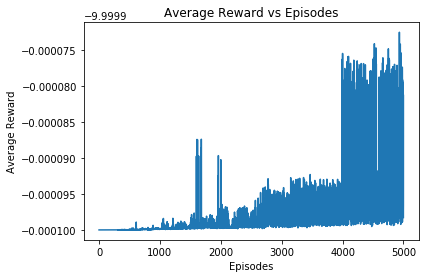

In [ ]:
plt.plot(avgreward)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')   

Text(0.5, 1.0, 'Average number of steps to goal vs Episodes')

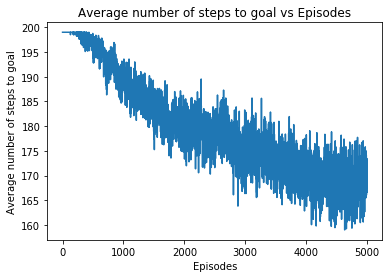

In [ ]:
plt.plot(avgsteps)
plt.xlabel('Episodes')
plt.ylabel('Average number of steps to goal')
plt.title('Average number of steps to goal vs Episodes')

Text(0.5, 1.0, 'Cars final position vs Episodes')

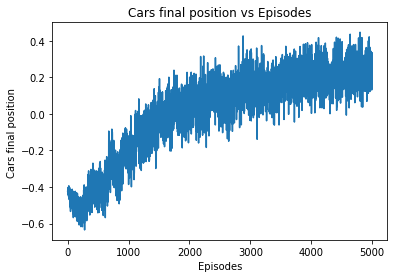

In [ ]:
plt.plot(finalpos)
plt.xlabel('Episodes')
plt.ylabel('Cars'' final position ')
plt.title('Cars'' final position vs Episodes')

In [ ]:
X = np.random.uniform(-1.2, 0.6, 10000)
Y = np.random.uniform(-0.07, 0.07, 10000)
Z = []
for i in range(len(X)):
    sp = int(X[i]*10) + 12
    sv = int(Y[i]*100) + 7
    Z.append(np.argmax(Q[sp][sv]))
Z = pd.Series(Z)
colors = {0:'blue',1:'lime',2:'red'}
colors = Z.apply(lambda x:colors[x])
labels = ['Left','Right','Nothing']

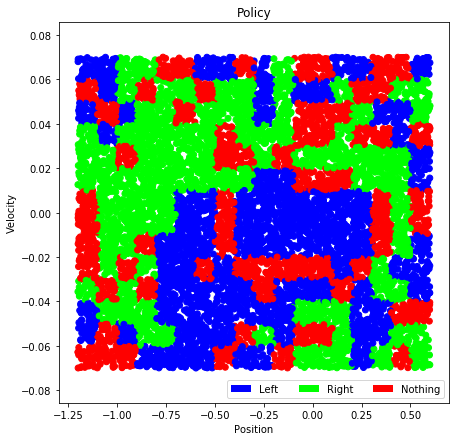

In [ ]:
fig = plt.figure(3, figsize=[7,7])
ax = fig.gca()
plt.set_cmap('brg')
surf = ax.scatter(X,Y, c=Z)
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Policy')
recs = []
for i in range(0,3):
     recs.append(mpatches.Rectangle((0,0),1,1,fc=sorted(colors.unique())[i]))
plt.legend(recs,labels,loc=4,ncol=3)
plt.show()